In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

In [2]:
df = pd.read_csv('data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
# Проверка на пропущенные значения, они найдены в столбце с номером 32
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

Убираем столбец 'Unnamed: 32'

In [4]:
df.drop('Unnamed: 32',axis=1,inplace=True)

Удаляем признак id как неинформативный

In [5]:
df.drop('id', axis = 1, inplace=True)

#### Смотрим распределение целевой переменной

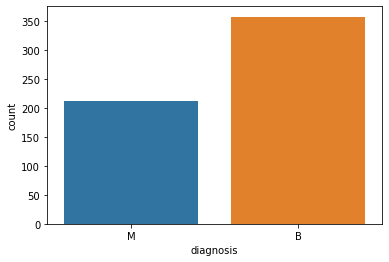

In [6]:
sns.countplot(df['diagnosis'])

#### Вычисляем базовые статистики - видим, что нет выбросов данных:

In [7]:
df.describe(percentiles=[0.25, 0.75, 0.99,0.999])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
99%,24.371600,30.652000,165.724000,1786.600000,0.132888,0.277192,0.351688,0.164208,0.259564,0.085438,...,30.762800,41.802400,208.304000,2918.160000,0.188908,0.778644,0.902380,0.269216,0.486908,0.140628
99.9%,27.718080,36.173040,187.591200,2499.864000,0.152778,0.326088,0.426573,0.195577,0.296389,0.096480,...,34.387120,48.188160,238.760800,3787.104000,0.220214,0.989783,1.205424,0.290602,0.614725,0.187904
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Строим гистограммы признаков. Большинство признаков имеют распределение далекие от нормального.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f918ba8f390>,
      dtype=object)

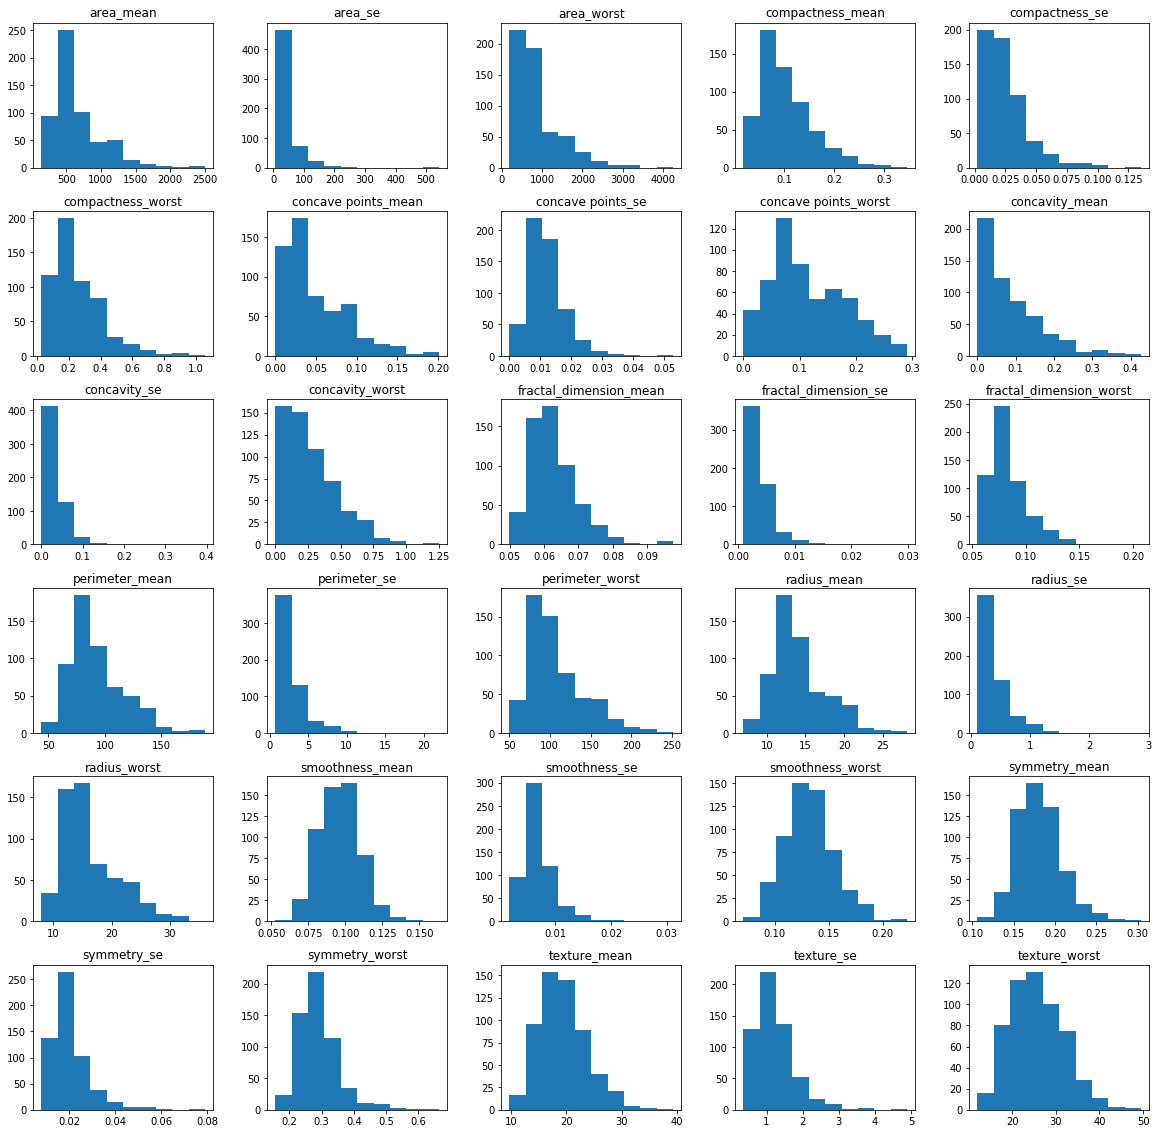

In [8]:
df.hist(bins = 10, figsize = (20,20), grid = False)

Вычисляем корреляции признаков:

In [9]:
Corr = df.corr()

#### Выбираем пары признаков с корреляцией больше $0.85$ по абсолютной величине. Составляем список CorField признаков, после удаления которых попарная корреляция станет $\le 0.85$ по абсолютной величине.

In [10]:
CorField = []
for i in Corr:
    for j in Corr.index[abs(Corr[i]) > 0.85]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i, j, Corr[i][Corr.index == j].values[0])

radius_mean perimeter_mean 0.9978552814938113
radius_mean area_mean 0.9873571700566119
radius_mean radius_worst 0.9695389726112053
radius_mean perimeter_worst 0.9651365139559878
radius_mean area_worst 0.9410824595860459
texture_mean texture_worst 0.9120445888404215
compactness_mean concavity_mean 0.8831206701772499
compactness_mean compactness_worst 0.8658090398022638
concave points_mean concave points_worst 0.9101553142985934
radius_se perimeter_se 0.9727936770160752
radius_se area_se 0.95183011211099


In [11]:
CorField

['perimeter_mean',
 'area_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'texture_worst',
 'concavity_mean',
 'compactness_worst',
 'concave points_worst',
 'perimeter_se',
 'area_se']

#### Построим гистограммы и попарные scatterplot-ы для группы признаков ['radius_mean', 'perimeter_mean','area_mean', 'radius_worst', 'perimeter_worst', 'area_worst']

In [12]:
Correlated = ['diagnosis','radius_mean', 'perimeter_mean','area_mean', 'radius_worst', 'perimeter_worst', 'area_worst']

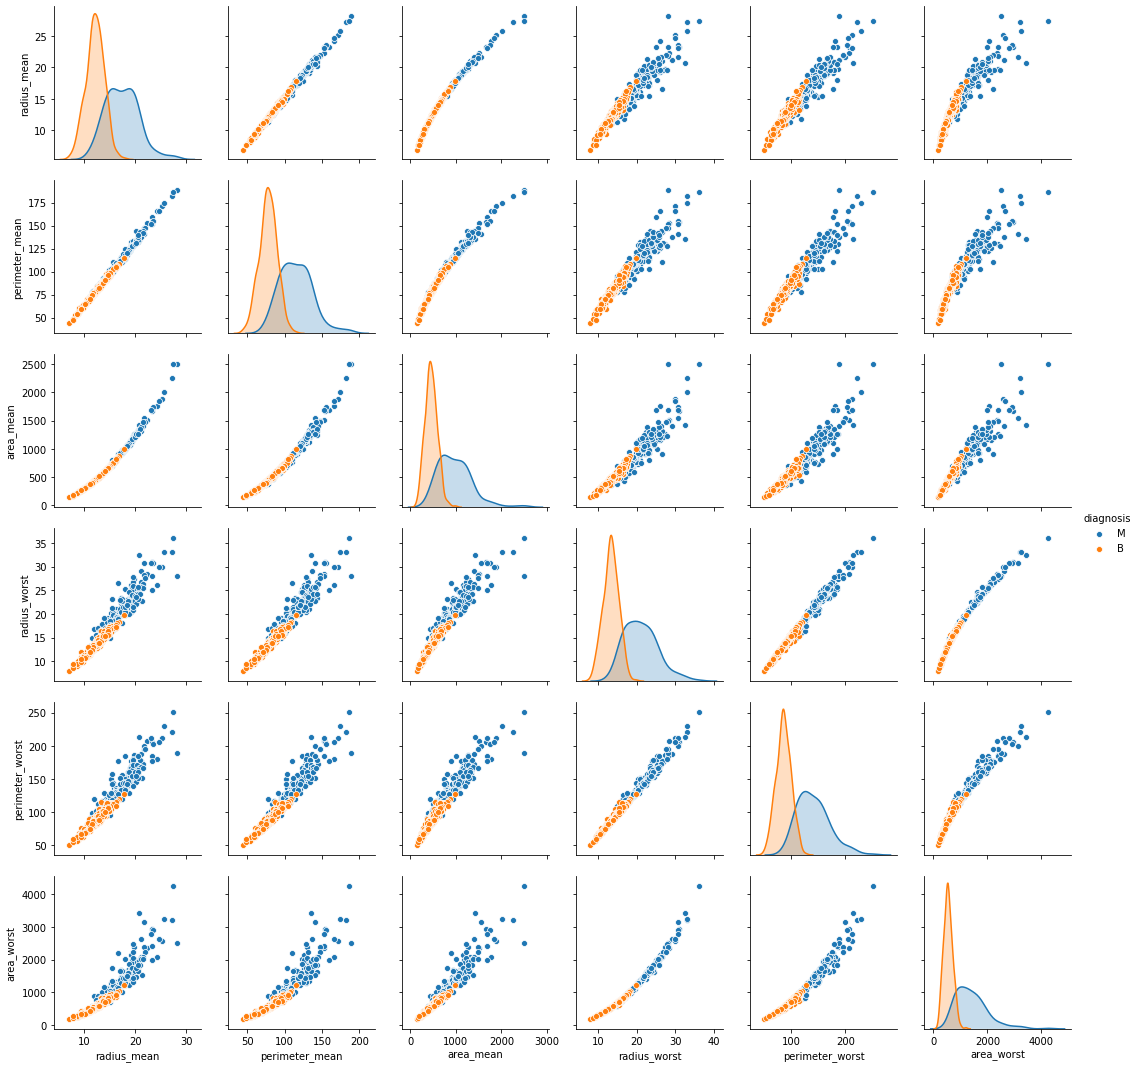

In [13]:
sns.pairplot(df[Correlated], hue='diagnosis')

#### Особенно сильную линейную зависимость показывают признаки 'radius_mean' и 'perimeter_mean'.

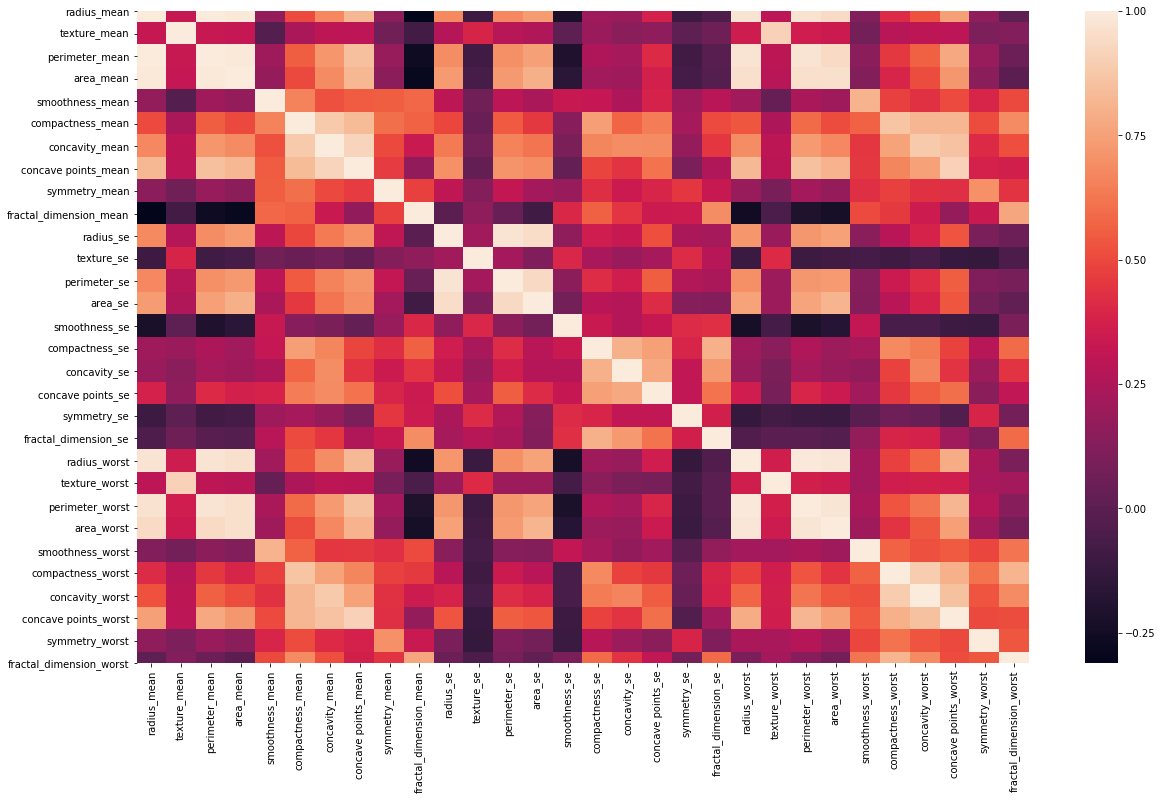

In [14]:
# heatmap для матрицы корреляций всех признаков
plt.figure(figsize=(20,12))
sns.heatmap(Corr)

#### Введем целевую переменую

In [15]:
y = df['diagnosis']

#### Отдельно посмотрим на диаграммы рассеяния и "ящики с усами" по целевой переменной diagnosis признаков из группы ['radius_mean', 'texture_mean', 'compactness_mean', 'concave points_mean', 'radius_se']

Text(0.5, 1.0, 'radius_mean')

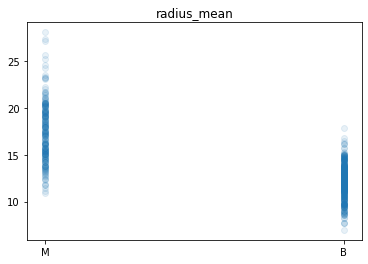

In [16]:
plt.scatter(y, df['radius_mean'], alpha=0.1)
plt.title('radius_mean')

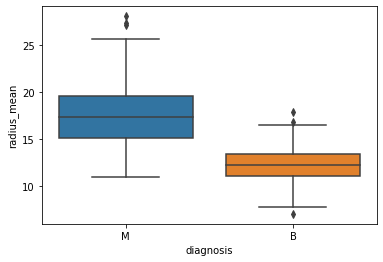

In [17]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)

Text(0.5, 1.0, 'texture_mean')

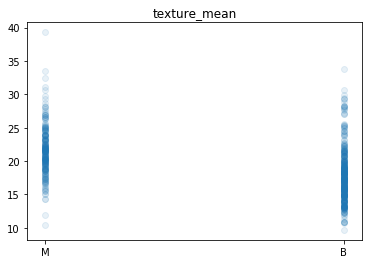

In [18]:
plt.scatter(y, df['texture_mean'], alpha=0.1)
plt.title('texture_mean')

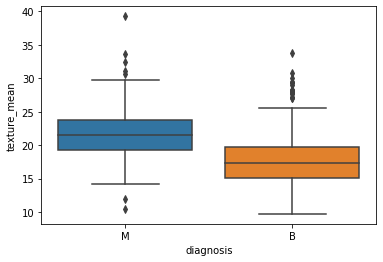

In [19]:
sns.boxplot(x='diagnosis', y='texture_mean', data=df)

Text(0.5, 1.0, 'compactness_mean')

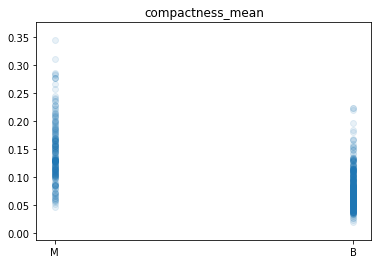

In [20]:
plt.scatter(y, df['compactness_mean'], alpha=0.1)
plt.title('compactness_mean')

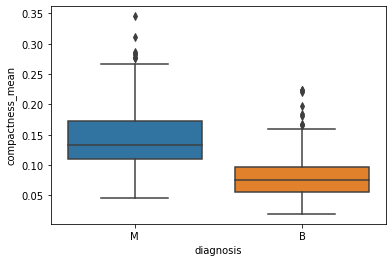

In [21]:
sns.boxplot(x='diagnosis', y='compactness_mean', data=df)

Text(0.5, 1.0, 'concave points_mean')

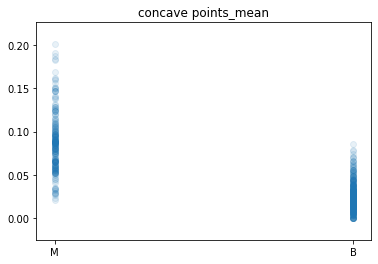

In [22]:
plt.scatter(y, df['concave points_mean'], alpha=0.1)
plt.title('concave points_mean')

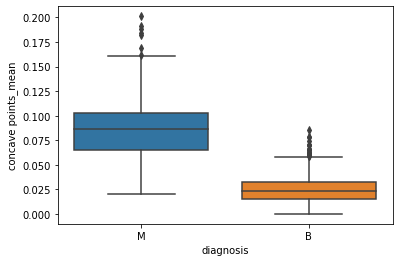

In [23]:
sns.boxplot(x='diagnosis', y='concave points_mean', data=df)

Text(0.5, 1.0, 'radius_se')

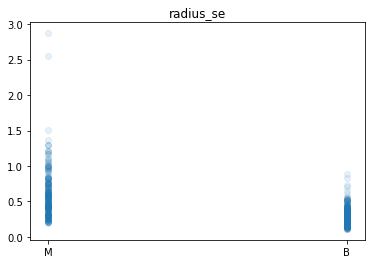

In [24]:
plt.scatter(y, df['radius_se'], alpha=0.1)
plt.title('radius_se')

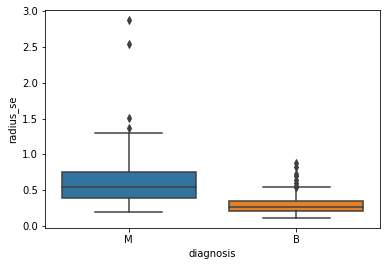

In [25]:
sns.boxplot(x='diagnosis', y='radius_se', data=df)

Из рисунков видно, что признаки 'concave points_mean', 'radius_mean' и'radius_se' хорошо разделяют целевую переменную.

## ML

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Закодируем целевую переменную.

In [28]:
y_enc = LabelEncoder().fit_transform(y)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
scaler = StandardScaler()

#### Создадим матрицу объясняющих переменных.

In [31]:
X = df.drop('diagnosis', axis=1)

In [32]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))
    return [accuracy, precision, recall, f1]

### KNN

#### Делим на тренировочную и тестовую выборки с балансировкой по целевой переменной.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.3, random_state=42, stratify=y_enc)

#### Масштабируем признаки. Это нужно, поскольку признаки имеют различные единицы измерения (ср., например, максимальные значения для area_mean и smoothness_mean).

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

#### Строим модель kNN "из коробки" без настройки параметров.

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
y_knn_pred = knn.predict(X_test_scaled)

#### Смотрим на метрики качества бинарной классификации.

In [38]:
knn_quality = quality(y_knn_pred, y_test)

Accuracy:  0.965
Precision: 0.906
Recall:    1.000
F1-score:  0.951


#### Строим ROC-кривую и считайте площадь под ней.

In [39]:
y_knn_pred_proba = knn.predict_proba(X_test_scaled)[:,1]

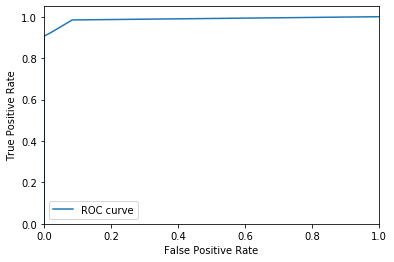

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_knn_pred_proba)
plt.plot(fpr, tpr)
plt.legend(["ROC curve"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [41]:
roc_auc_score(y_test, y_knn_pred_proba)

0.9881717289719626

#### Проводим настройку параметра числа соседей и метрики расстояния на кросс-валидации.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

grid_search = GridSearchCV(knn, param_grid, n_jobs=-1, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50), 'p': range(1, 4)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [44]:
knn_cv = grid_search.best_estimator_

#### Оптимальное количество соседей оказалось такое, как "по-умолчанию", а метрика сменилась на манхеттеновскую.

In [45]:
print("Best CV score: {:.3f}, best CV k: {}, best CV p: {}".format(
    grid_search.best_score_, knn_cv.n_neighbors, knn_cv.p)
) 

Best CV score: 0.960, best CV k: 5, best CV p: 1


In [46]:
y_knn_cv_pred = knn_cv.predict(X_test_scaled)

#### Все метрики качества бинарной классификации улучшились. 

In [47]:
knn_cv_quality = quality(y_knn_cv_pred, y_test)

Accuracy:  0.971
Precision: 0.922
Recall:    1.000
F1-score:  0.959


#### Строим ROC-кривую и считайте площадь под ней.

In [48]:
y_knn_cv_pred_proba = knn_cv.predict_proba(X_test_scaled)[:,1]

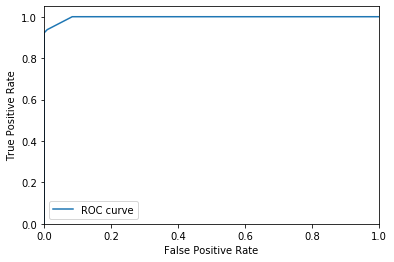

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_knn_cv_pred_proba)
plt.plot(fpr, tpr)
plt.legend(["ROC curve"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [50]:
roc_auc_score(y_test, y_knn_cv_pred_proba)

0.9970064252336448

### Logistic Regression

#### Удаляем переменные, корреляция Пирсона с которыми превышает $0.85$.

In [51]:
X_lr = X.drop(CorField, axis=1)

In [52]:
X_lr.shape

(569, 19)

#### Делим на тренировочную и тестовую выборки с балансировкой по целевой переменной.

In [53]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test =\
train_test_split(X_lr, y_enc, test_size=0.3, random_state=42, stratify=y_enc)

Масштабируем признаки.

In [54]:
X_lr_train_scaled = scaler.fit_transform(X_lr_train)
X_lr_test_scaled = scaler.transform(X_lr_test)

In [55]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#### Строим модель логистической регрессии "из коробки", без настройки параметров:

In [56]:
logReg = LogisticRegression()
logReg.fit(X_lr_train_scaled, y_lr_train)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_lr_pred = logReg.predict(X_lr_test_scaled)

In [58]:
lr_quality = quality(y_lr_pred, y_lr_test)

Accuracy:  0.977
Precision: 0.938
Recall:    1.000
F1-score:  0.968


In [59]:
y_lr_pred_proba = logReg.predict_proba(X_lr_test_scaled)[:,1]

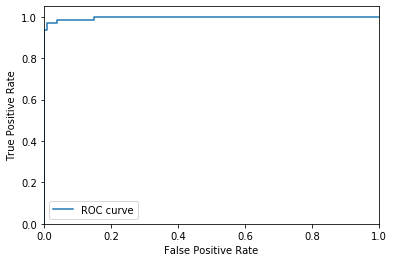

In [60]:
fpr, tpr, thresholds = roc_curve(y_lr_test, y_lr_pred_proba)
plt.plot(fpr, tpr)
plt.legend(["ROC curve"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [61]:
roc_auc_score(y_lr_test, y_lr_pred_proba)

0.9967873831775701

#### Визуализируем влияние коэффициентов регрессии на целевую переменную.

In [62]:
FW = pd.DataFrame({'feature': X_lr.columns, 'weight': logReg.coef_[0]})
FW.set_index('feature', inplace=True)
FW.sort_values(['weight'], ascending=False, inplace=True)

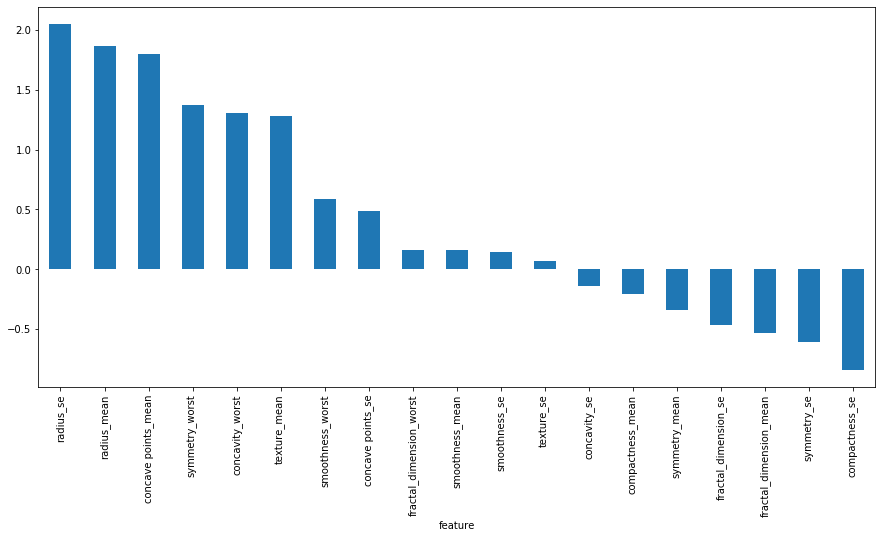

In [63]:
FW['weight'].plot(kind ='bar', figsize=(15, 7))

#### Проведем настройку параметра регуляризации C на кросс-валидации.

In [64]:
logRegCV = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100], solver='liblinear', random_state=42, n_jobs=-1, verbose=3)

In [65]:
logRegCV_best = logRegCV.fit(X_lr_train_scaled, y_lr_train)

[LibLinear]

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


#### Видим, что наилучшим значением параметром регуляризации является C=1 - как по-умолчанию.

In [66]:
logRegCV_best.C_

array([1.])

#### Посмотрим, можно ли сохранить качество обучения и при этом сократить количество значимых признаков при помощи лассо-регуляризации:

In [67]:
logRegL1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, n_jobs=-1, verbose=3)
logRegL1.fit(X_lr_train_scaled, y_lr_train)

[LibLinear]

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1', random_state=42,
                   solver='liblinear', tol=0.0001, verbose=3, warm_start=False)

In [68]:
logL1pred = logRegL1.predict(X_lr_test_scaled)

In [69]:
lr_l1_quality = quality(logL1pred, y_lr_test)

Accuracy:  0.977
Precision: 0.938
Recall:    1.000
F1-score:  0.968


#### Визуализируем влияние коэффициентов регрессии на целевую переменную.

In [70]:
FW = pd.DataFrame({'feature': X_lr.columns, 'weight': logRegL1.coef_[0]})
FW.set_index('feature', inplace=True)
FW = FW.loc[FW['weight']!=0]
FW.sort_values(['weight'], ascending=False, inplace=True)

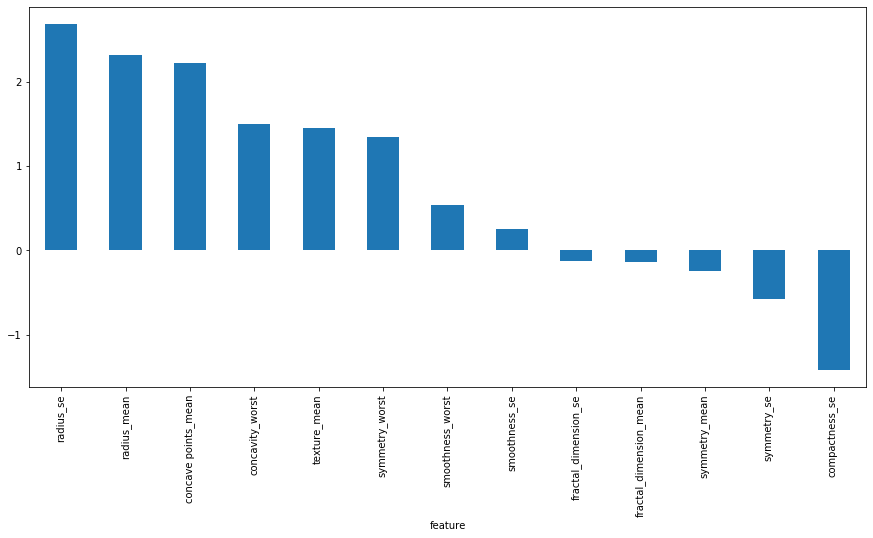

In [71]:
FW['weight'].plot(kind ='bar', figsize=(15, 7))

### Видим, что нам удалось сохранить качество обущения и сократить количество значимых признаков до 13.

### При этом, все исследуемые метрики качества бинарной классификации у метода логистической регрессии оказались лучше, чем по методу ближайших соседей.